Exercises
The end result of this exercise should be a file named prepare.py.

Using your store items data:

Convert date column to datetime format.
Plot the distribution of sale_amount and item_price.
Set the index to be the datetime variable.
Add a 'month' and 'day of week' column to your dataframe.
Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.



In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import get_all_store_data

In [2]:
df = get_all_store_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
# Convert date column to datetime format.
df.sale_date = pd.to_datetime(df.sale_date)

In [5]:
df.sale_date = df.sale_date.apply(lambda date: date[:-13])
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63.0,2017-12-27 00:00:00+00:00,912996,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912996,50,59.0,2017-12-28 00:00:00+00:00,912997,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912997,50,74.0,2017-12-29 00:00:00+00:00,912998,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912998,50,62.0,2017-12-30 00:00:00+00:00,912999,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


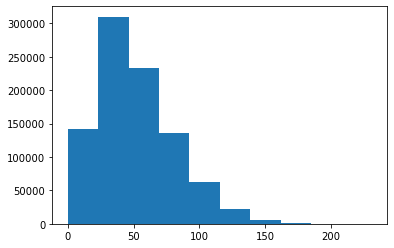

In [8]:
# Plot the distribution of sale_amount and item_price.
plt.hist(df.sale_amount)
plt.show()

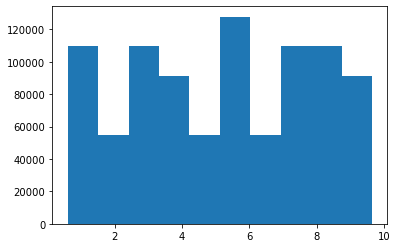

In [9]:
plt.hist(df.item_price)
plt.show()

In [10]:
# Set the index to be the datetime variable.
df = df.set_index('sale_date').sort_index()
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


In [11]:
# Add a 'month' and 'day of week' column to your dataframe.
df['month'] = df.index.month_name()

In [12]:
# Add a 'day of week' column to your dataframe.
df['day_of_week'] = df.index.day_name()

In [13]:
df

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,34,21.0,619014,9,735 SW Military Dr,San Antonio,TX,78221,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,December,Sunday
2017-12-31 00:00:00+00:00,34,32.0,620840,10,8503 NW Military Hwy,San Antonio,TX,78231,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,December,Sunday
2017-12-31 00:00:00+00:00,35,55.0,622666,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,December,Sunday


In [14]:
# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
df['sales_total'] = df.sale_amount * df.item_price
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


In [88]:
# Make sure all the work that you have done above is reproducible. 
# That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.
def prep_store_data(df):
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    df = df.set_index('sale_date').sort_index()
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [89]:
df = get_all_store_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [90]:
df = prep_store_data(df)
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format.
1. Plot the distribution of each of your variables.
1. Set the index to be the datetime variable.
1. Add a month and a year column to your dataframe.
1. Fill any missing values.
1. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [24]:
from acquire import get_opsd_data

In [43]:
ops_df =  get_opsd_data()
ops_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [44]:
ops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [45]:
# convert date column to a datetime format
ops_df.Date = pd.to_datetime(ops_df.Date)
ops_df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


Column: Date


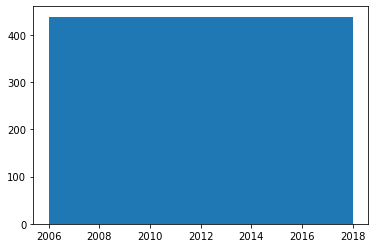

Column: Consumption


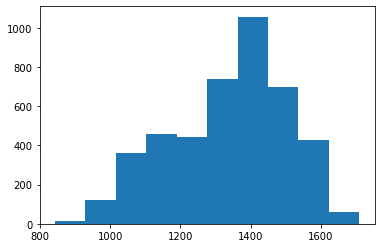

Column: Wind


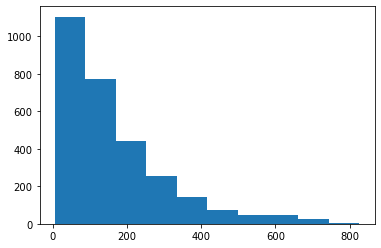

Column: Solar


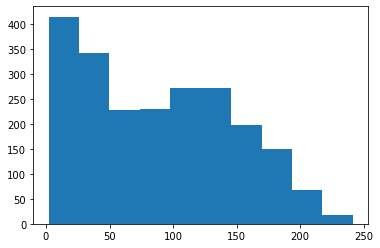

Column: Wind+Solar


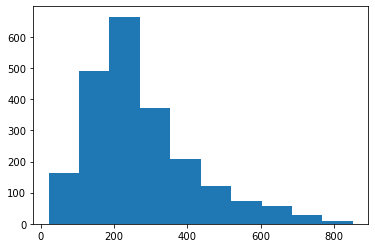

In [46]:
# plot distribution of variables
for col in ops_df.columns:
    print('Column: ' + col)
    plt.hist(ops_df[col])
    plt.show()

In [47]:
# fix the names so there are no upper cases or special characters
ops_df.columns = [col.replace('+','-').lower()for col in ops_df.columns]

In [48]:
# Set the index to be the datetime variable.
ops_df = ops_df.set_index('date').sort_index()
ops_df.head()

,consumption,wind,solar,wind-solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [50]:
# Add a month and a year column to your dataframe.
ops_df['month'] = ops_df.index.month_name()
ops_df['year'] = ops_df.index.year
ops_df.head()


,consumption,wind,solar,wind-solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


In [53]:
# Fill any missing values.
ops_df.isna().sum()

consumption       0
wind           1463
solar          2195
wind-solar     2196
month             0
year              0
dtype: int64

In [55]:
ops_df['wind_solar'] = ops_df['wind'] + ops_df['solar']

In [ ]:
# Make sure all the work that you have done above is reproducible. 
# That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.